In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape # this datset only has 200 rows and 5 columns

(200, 5)

In [7]:
# Checking null values
df.isnull().sum()

# There are no null values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
# we can see there is no proper name for Unnamed:0, we will change the column name
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [9]:
df.head(6)

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


## EDA

In [10]:
df.info()
# we can see all the features are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.describe().T

# we can say that the features are largely distributed
# Outliers migh be present in newspaper and TV features

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [12]:
#sales is our target variable

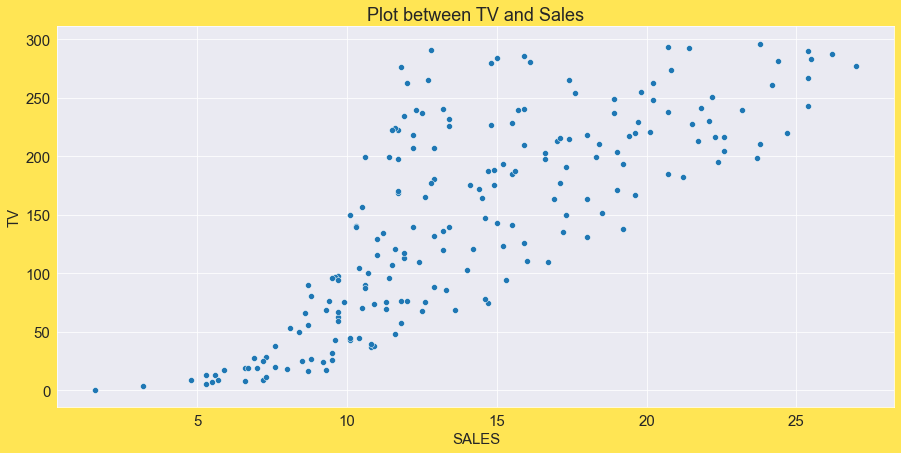

In [13]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between TV and Sales')
sns.scatterplot(x = df['sales'],y = df['TV'])

plt.xlabel('SALES')
plt.ylabel('TV')
plt.show()

# We can see there is a positive correlation between sales and TV
# which is showing that sales are increasing with increase in distribution through TV chanel

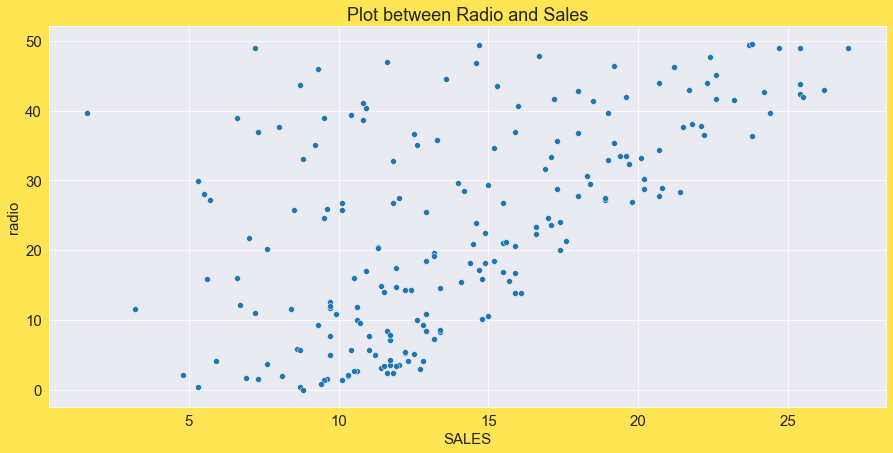

In [14]:
# 
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Radio and Sales')
sns.scatterplot(x = df['sales'],y = df['radio'])

plt.xlabel('SALES')
plt.ylabel('radio')
plt.show()

# we can see radio is also positively correlated with sales

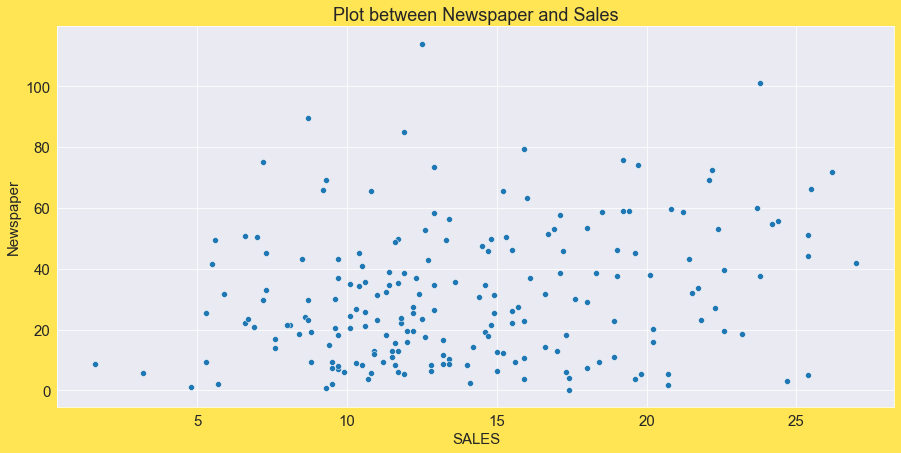

In [15]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Newspaper and Sales')
sns.scatterplot(x = df['sales'],y = df['newspaper'])

plt.xlabel('SALES')
plt.ylabel('Newspaper')
plt.show()

# We can see there is not much effective sales by the thruough Newspapers 

<AxesSubplot:xlabel='TV', ylabel='Density'>

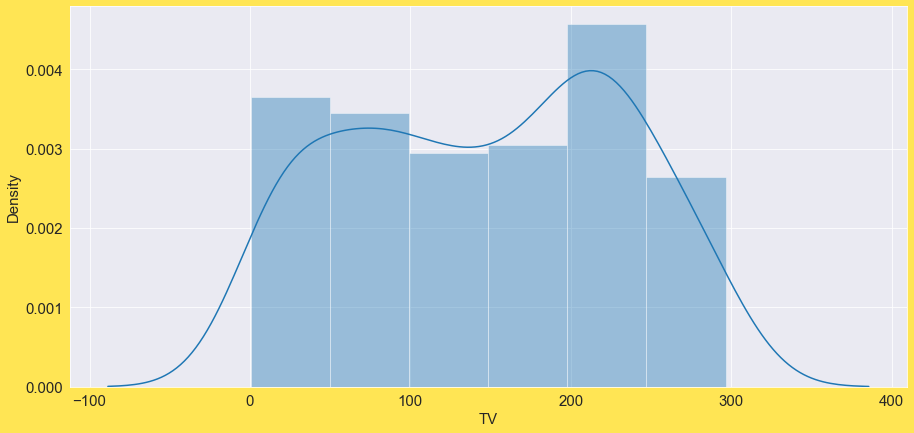

In [16]:
# Univariate Analysis
sns.distplot(df['TV'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

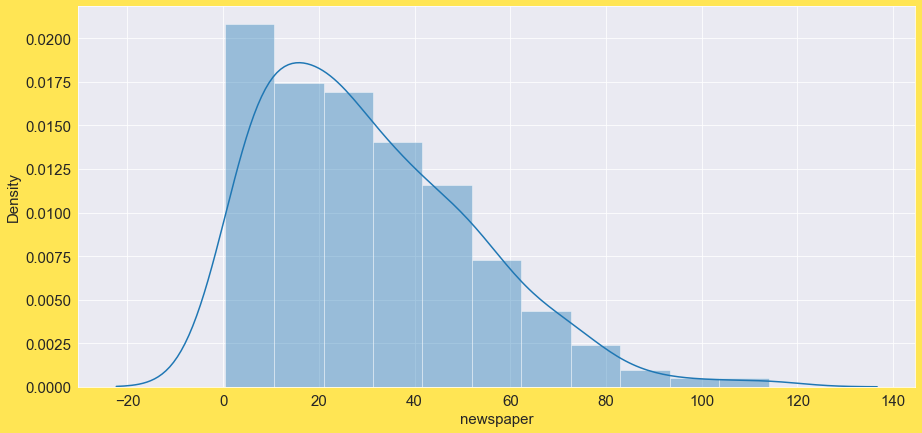

In [17]:
sns.distplot(df['newspaper'])
# we can see that newspaper is right skewed

<AxesSubplot:xlabel='radio', ylabel='Density'>

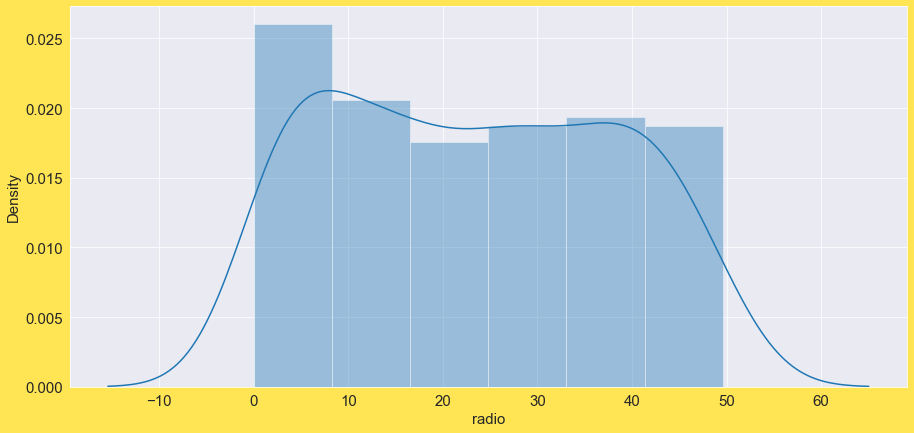

In [18]:
sns.distplot(df['radio'])

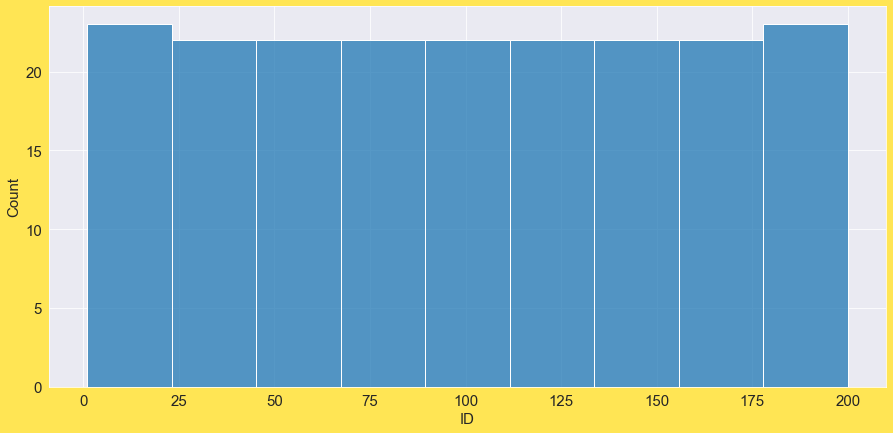

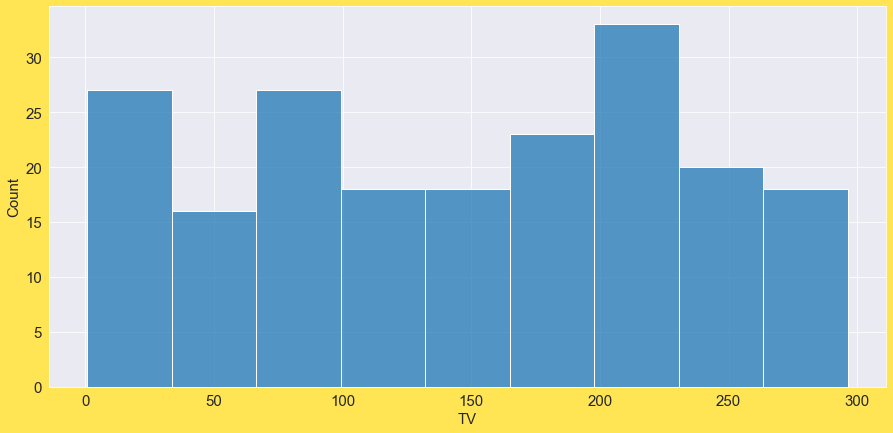

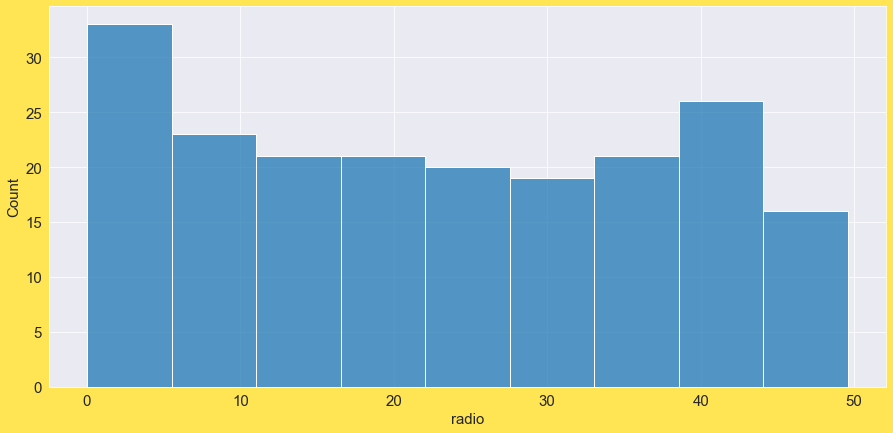

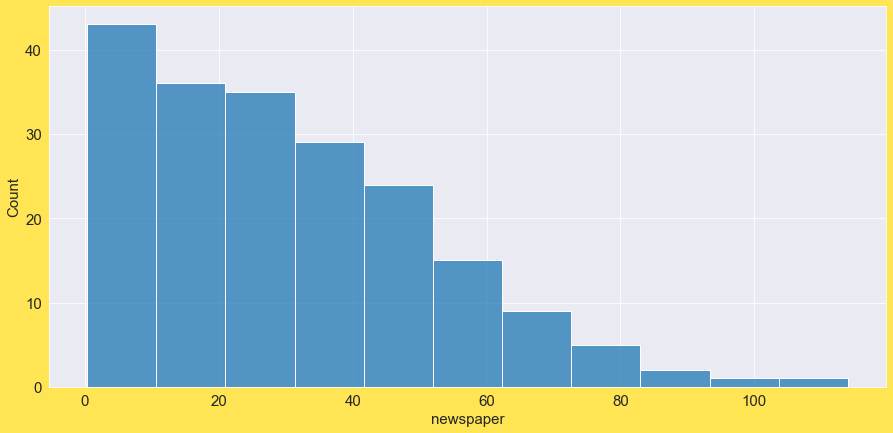

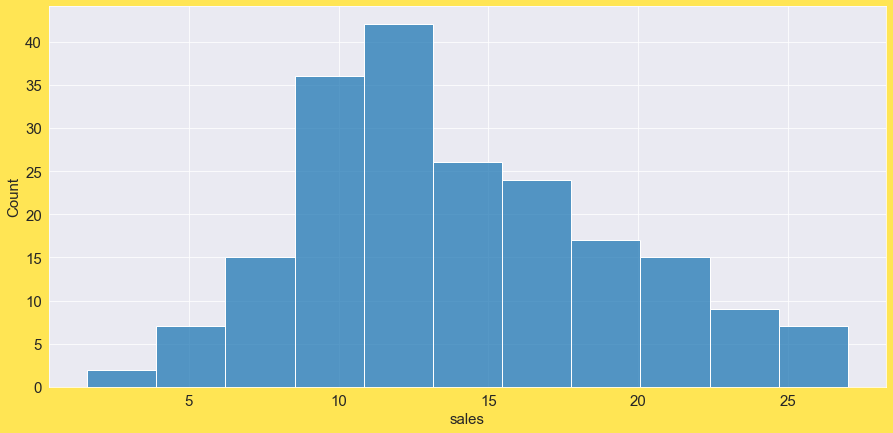

In [19]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

In [20]:
# WE WILL DROP THE ID COLUMN WHICH IS OF NO USE FOR OUR MODEL

In [21]:
df.drop(['ID'],axis=1,inplace=True)

In [22]:
df.sample(3)

,TV,radio,newspaper,sales
28,248.8,27.1,22.9,18.9
75,16.9,43.7,89.4,8.7
51,100.4,9.6,3.6,10.7


In [23]:
# CHECKING THE CORRELATION

In [24]:
df.corr().T

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

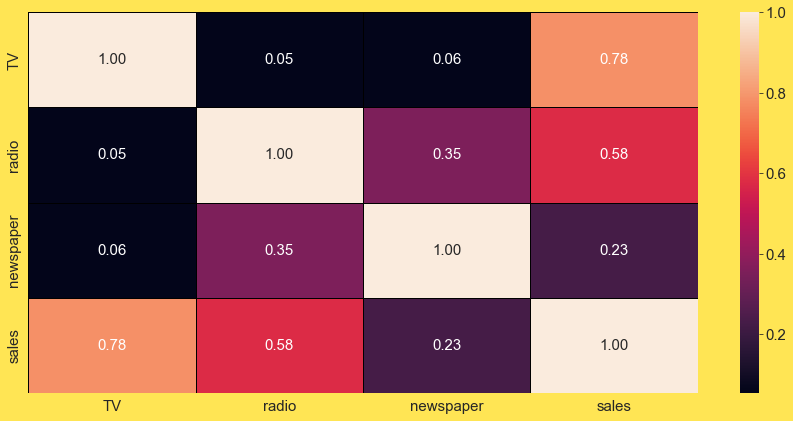

In [25]:
# plotting a heatmap to see clearly
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [26]:
# CHECKING MULTICOLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# CREATING A instance for continuous columns
contcols = df[['TV','radio','newspaper']]
contcols.shape

(200, 3)

In [28]:
# CREATING A FUNCTION AND A DATAFRAME TO COMAPRE THE VIF SCORE OF EACH CONTINUOIUS COLUMN
def vif_calc():
    vif = pd.DataFrame()
    vif['Features'] = contcols.columns
    vif['VIF Factor'] = [variance_inflation_factor(contcols.values,i) for i in range(contcols.shape[1])]
    print(vif)

In [29]:
vif_calc() 

# WE CAN SEE THE VIF SCORE IS LESS, SO THERE IS NO MULTICOLLINEARITY PRESENT BETWEEN THE FEATURES

    Features  VIF Factor
0         TV    2.486772
1      radio    3.285462
2  newspaper    3.055245


In [30]:
# CHECKING THE OUTLIERS

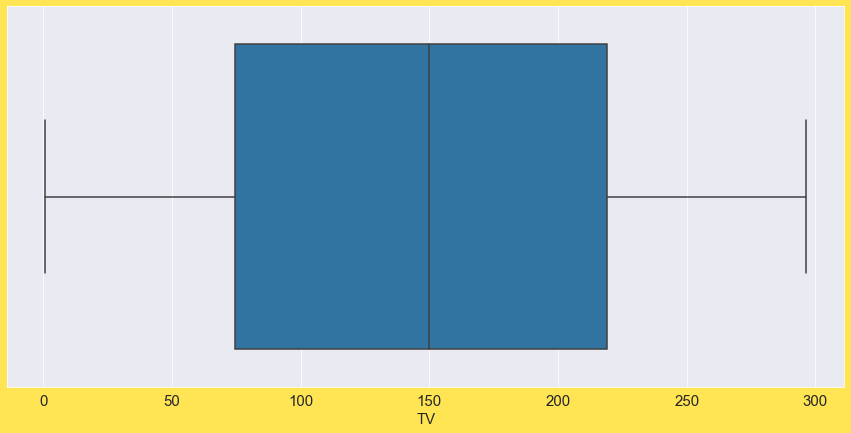

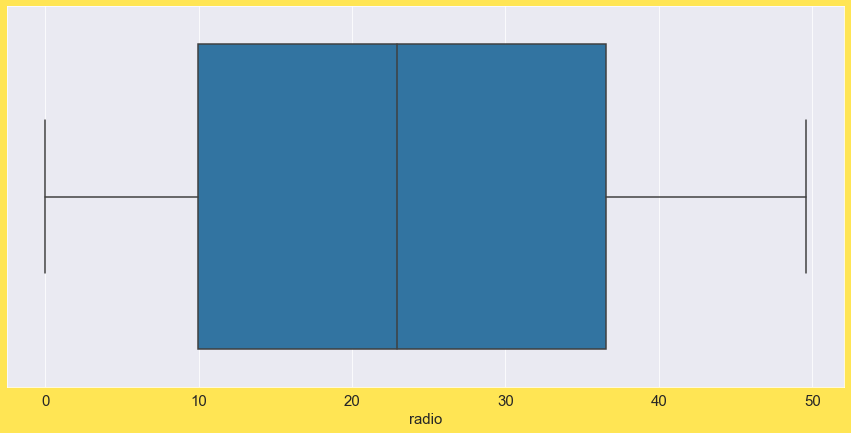

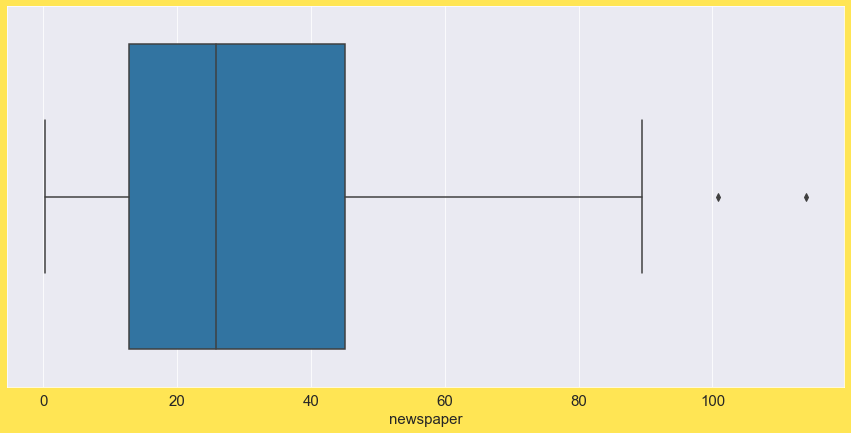

In [31]:
contcols = df[['TV','radio','newspaper']]

for i in contcols:
    sns.boxplot(df[i])
    plt.show()
    
# we can see there are outliers only in newsapaper

In [32]:
contcols = df[['TV','radio','newspaper']]

from scipy.stats import zscore
z = np.abs(zscore(contcols))
print(np.where(z>3))

# we can see outliers are present only in feature 2 i.e., newspaper

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [33]:
# Removing the outliers 
df_new = df[(z<3).all(axis=1)]

In [34]:
# CHECKING THE SHAPE OF DF BEFORE AND AFTER REMOVING THE OUTLIERS AND CHECKING THE % LOSS OF DATA
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

shape before and after
shape before         : (200, 4)
shape after          : (198, 4)
Percentage Loss      : 1.0


In [35]:
# # finding out the quantile of data with continuous columns
Q1 = contcols.quantile(0.25)
Q3 = contcols.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD (be carefull with the variables used here)
df_new_quant = df[~((contcols < (Q1 - 1.5 * IQR)) |(contcols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new_quant.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new_quant.shape[0])/df.shape[0]*100)

# We can see that the dataloss is same using quantile method as well

shape before and after
shape before         : (200, 4)
shape after          : (198, 4)
Percentage Loss      : 1.0


In [37]:
df_new.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='newspaper'>

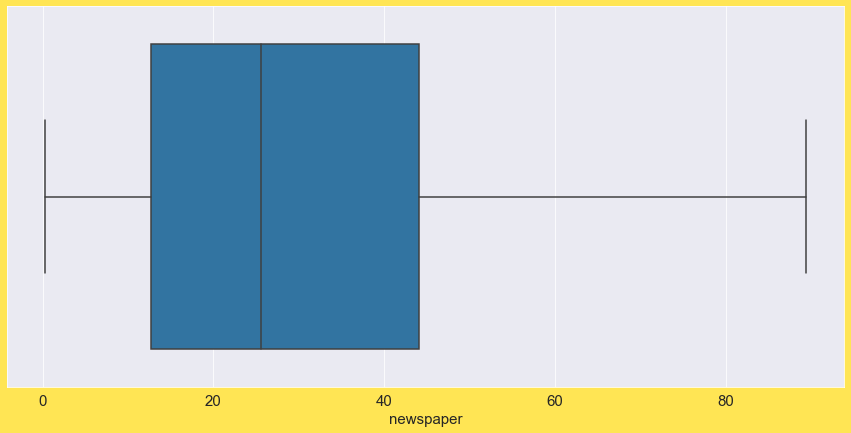

In [38]:
# CHECKING THE OUTLIERS AGAIN FOR THE NEWSPAPER COLUMN
sns.boxplot(df_new['newspaper'])

# we can see outliers are removed

In [39]:
# CHECKING SKEWNESS
df_new.skew().sort_values()
# setting threshold as 0.1 skew, removing skewness from newspaper

TV          -0.082332
radio        0.114842
sales        0.407130
newspaper    0.650112
dtype: float64

In [40]:
# we can see there newspaper is skewed more 

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

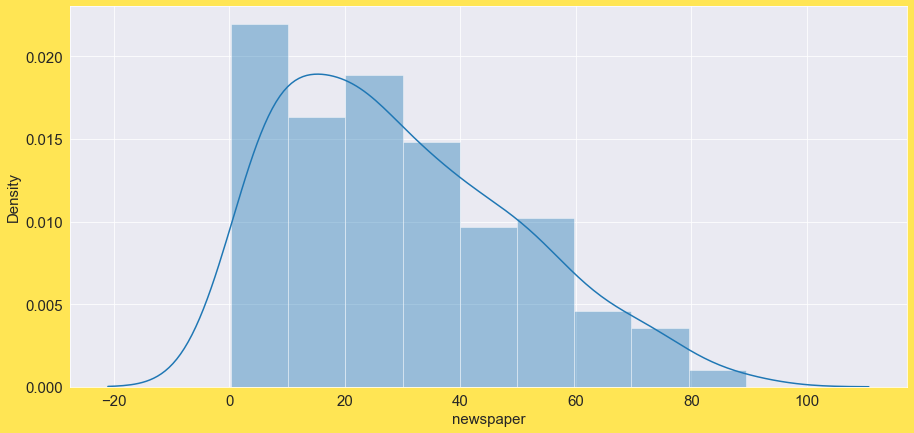

In [41]:
sns.distplot(df_new['newspaper'])

In [42]:
# removing skewnees
df_new['newspaper'] = np.sqrt(df_new['newspaper'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

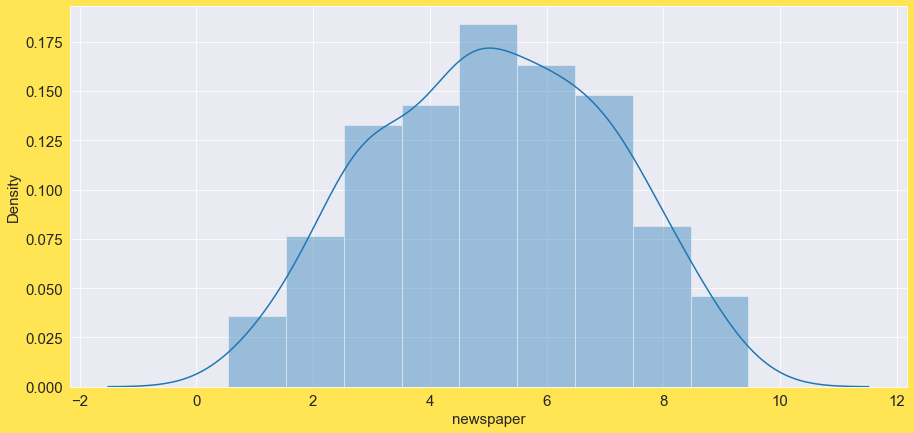

In [43]:
sns.distplot(df_new['newspaper']) # we can see that the skewness is removed, now it is almost normal distribution

In [44]:
df_new.skew().sort_values() # we can see that the skewness is reduced there isn alomost 0.0 skewness in the tv and newspaper and 0.1 in radio

TV          -0.082332
newspaper   -0.040649
radio        0.114842
sales        0.407130
dtype: float64

In [45]:
# SPLITTING THE DATA

In [46]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [47]:
x.sample()

,TV,radio,newspaper
31,112.9,17.4,6.21289


In [48]:
y.sample()

108    5.3
Name: sales, dtype: float64

In [49]:
# SCALING THE DATA 

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [52]:
x

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

### CREATING THE MODEL

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Linear Regression

In [54]:
# CHECKING THE RANDOM STATE FOR LINEAR REGRESSION
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training r2 score is ', round(r2_score(y_train,pred_train)*100,1))
        print('Testing r2 score is ', round(r2_score(y_test,pred_test)*100,1), '\n\n')

At random state 51 The model performs very well
At random state:- 51
Training r2 score is  89.3
Testing r2 score is  89.3 


At random state 168 The model performs very well
At random state:- 168
Training r2 score is  89.2
Testing r2 score is  89.2 


At random state 211 The model performs very well
At random state:- 211
Training r2 score is  89.3
Testing r2 score is  89.3 


At random state 309 The model performs very well
At random state:- 309
Training r2 score is  89.5
Testing r2 score is  89.5 


At random state 321 The model performs very well
At random state:- 321
Training r2 score is  89.3
Testing r2 score is  89.3 


At random state 327 The model performs very well
At random state:- 327
Training r2 score is  89.4
Testing r2 score is  89.4 


At random state 536 The model performs very well
At random state:- 536
Training r2 score is  89.3
Testing r2 score is  89.3 


At random state 761 The model performs very well
At random state:- 761
Training r2 score is  89.3
Testing r2 scor

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=51)

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
pred = lr.predict(x_test)

In [58]:
r2_score(y_test,pred)

0.8926399162265253

In [59]:
mean_squared_error(y_test,pred)

2.6091658532752033

In [60]:
mean_absolute_error(y_test,pred)

1.3258482248628383

In [61]:
# root mean squared error
np.sqrt(mean_squared_error(y_test,pred))

1.615291259579895

In [62]:
# CROSS VALIDATION for linear Regression

pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lrs = r2_score(y_test,pred_lr)

In [63]:
for i in range(4,10):
    lrcscore = cross_val_score(lr,x,y,cv=i)
    print(lrcscore)
    lsc = lrcscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',lsc*100)
    print('r2_score is:- ',lrs*100)
    print('\n')

[0.88773334 0.91453399 0.84871665 0.90260192]
At cv:-  4
Cross validation score is:-  88.83964730592852
r2_score is:-  89.26399162265253


[0.87927341 0.91751522 0.92568478 0.81065809 0.89557158]
At cv:-  5
Cross validation score is:-  88.57406146589945
r2_score is:-  89.26399162265253


[0.87854655 0.9149545  0.90581225 0.82303266 0.89515599 0.90386267]
At cv:-  6
Cross validation score is:-  88.68941047683484
r2_score is:-  89.26399162265253


[0.86876067 0.91358788 0.89512333 0.93158231 0.79167006 0.87126896
 0.91628722]
At cv:-  7
Cross validation score is:-  88.40400627916499
r2_score is:-  89.26399162265253


[0.86287717 0.9016666  0.91688974 0.9075872  0.90400255 0.80726319
 0.89849476 0.90731381]
At cv:-  8
Cross validation score is:-  88.82618783932388
r2_score is:-  89.26399162265253


[0.88067506 0.86418703 0.92442946 0.86912944 0.93453342 0.74881545
 0.92063347 0.88694644 0.90188113]
At cv:-  9
Cross validation score is:-  88.12478781412287
r2_score is:-  89.26399162265253


In [64]:
# slecting cv=4 as the best cv parameter
lrcscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print('The cv score of linear Regression is ',lrcscore_selected,'\nThe accuracy score of linear regression is: ',lrs)

# Linear Regression is working 89%

The cv score of linear Regression is  0.8883964730592853 
The accuracy score of linear regression is:  0.8926399162265253


In [65]:
dtr = DecisionTreeRegressor()

knr = KNeighborsRegressor()

svr = SVR()

sgdr = SGDRegressor()

rfr = RandomForestRegressor()

abr = AdaBoostRegressor()

gbr = GradientBoostingRegressor()

In [66]:
# HYPERPARAMETER TUNING WITH DECESION Tree regresor
from sklearn.model_selection import GridSearchCV

### DecisionTreeRegressor

In [67]:
# creating parameter grid for dtr
param_grid_dtr = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
             'splitter':["best", "random"],'max_depth':[2,4,8,10,None],'max_features':[0.25,0.5,1.0],'min_samples_split':[0.25,0.5,1.0]}

In [68]:
dtr_search = GridSearchCV(dtr,param_grid=param_grid_dtr,cv=4)

In [69]:
dtr_search.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0],
                         'splitter': ['best', 'random']})

In [70]:
print(dtr_search.best_score_)
print(dtr_search.best_estimator_)
print(dtr_search.best_params_)

0.8441581778692782
DecisionTreeRegressor(max_depth=4, max_features=1.0, min_samples_split=0.25)
{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 0.25, 'splitter': 'best'}


In [71]:
dtr = DecisionTreeRegressor(criterion='squared_error',max_depth=4,max_features=1.0,min_samples_split=0.25,splitter='best') # using the best parameters
dtr.fit(x_train,y_train)
pred_dtr_test= dtr.predict(x_test)
pred_dtr_train = dtr.predict(x_train)
print('Training score of dtr',r2_score(pred_dtr_train,y_train))
print('Accuracy Score of dtr',r2_score(pred_dtr_test,y_test))
print('Mean Squared Error of dtr',mean_squared_error(pred_dtr_test,y_test))
print('Mean Absolute Error of dtr',mean_absolute_error(pred_dtr_test,y_test))
print('Root Mean Squared Error of dtr',np.sqrt(mean_squared_error(pred_dtr_test,y_test)))
print('\n')


Training score of dtr 0.8843808285916539
Accuracy Score of dtr 0.8135724158914243
Mean Squared Error of dtr 4.259118756730867
Mean Absolute Error of dtr 1.642368871252205
Root Mean Squared Error of dtr 2.063763251133925




### KNeighborsRegressor

In [72]:
# KNeighbors
param_grid_knr = {'n_neighbors':[2,3,4,5,6,7,8,9,10],'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree','kd_tree','brute'],'leaf_size':[25,30,35,40]}


In [73]:
knr_search = GridSearchCV(knr,param_grid=param_grid_knr)

In [74]:
knr_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [75]:
print(knr_search.best_score_)
print(knr_search.best_estimator_)
print(knr_search.best_params_)

0.9338790175403616
KNeighborsRegressor(leaf_size=25, n_neighbors=6, weights='distance')
{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 6, 'weights': 'distance'}


In [76]:
knr = KNeighborsRegressor(algorithm='auto',leaf_size=25,n_neighbors=6,weights='distance')# using the best parameters
knr.fit(x_train,y_train)
pred_knr_test= knr.predict(x_test)
pred_knr_train = knr.predict(x_train)
print('Training score of knr',r2_score(pred_knr_train,y_train))
print('Accuracy Score of knr',r2_score(pred_knr_test,y_test))
print('Mean Squared Error of knr',mean_squared_error(pred_knr_test,y_test))
print('Mean Absolute Error of knr',mean_absolute_error(pred_knr_test,y_test))
print('Root Mean Squared Error of knr',np.sqrt(mean_squared_error(pred_knr_test,y_test)))
print('\n')

# 87% from KNeighborsRegressor


Training score of dtr 1.0
Accuracy Score of dtr 0.8784960620953405
Mean Squared Error of dtr 2.2795999258064614
Mean Absolute Error of dtr 0.9945598852160351
Root Mean Squared Error of dtr 1.50983440343849




### SupportVectorRegressor

In [104]:
param_grid_svr = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                  'degree':[1,2,3,4,5,6],'gamma':['scale','auto'],'coef0':[0.0,0.1,0.2,0.3,0.4,0.5],'shrinking':[True,False],'cache_size':[100,150,200,250,300]}

In [105]:
svr_search = GridSearchCV(svr,param_grid=param_grid_svr)

In [106]:
svr_search.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'cache_size': [100, 150, 200, 250, 300],
                         'coef0': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]})

In [107]:
print(svr_search.best_score_)
print(svr_search.best_estimator_)
print(svr_search.best_params_)

0.983348193749172
SVR(cache_size=100, coef0=0.5, kernel='poly', shrinking=False)
{'cache_size': 100, 'coef0': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': False}


In [108]:
# using the best params
svr = SVR(cache_size=100,coef0=0.5,degree=3,gamma='scale',kernel='poly',shrinking=False)
svr.fit(x_train,y_train)
pred_svr_test= svr.predict(x_test)
pred_svr_train = svr.predict(x_train)
print('Training score of svr',r2_score(pred_svr_train,y_train))
print('Accuracy Score of svr',r2_score(pred_svr_test,y_test))
print('Mean Squared Error of svr',mean_squared_error(pred_svr_test,y_test))
print('Mean Absolute Error of svr',mean_absolute_error(pred_svr_test,y_test))
print('Root Mean Squared Error of svr',np.sqrt(mean_squared_error(pred_svr_test,y_test)))
print('\n')

# getting 99% accuracy from SVR

Training score of svr 0.9883385853046319
Accuracy Score of svr 0.9917942510113548
Mean Squared Error of svr 0.2003484197027236
Mean Absolute Error of svr 0.3450958466211818
Root Mean Squared Error of svr 0.44760297106109964




### SGDRegressor

In [109]:
param_grid_sgd = {'penalty':['l2','l1','elasticnet'],
                  'alpha':[.0001,.001,.01,.1,1,10],
                  'l1_ratio':[0.5,0.10,0.15,0.20,0.25],
                  'fit_intercept':[True,False],
                  'max_iter':[200,400,600,800,1000,1200],
                  'shuffle':[True,False]}

In [110]:
sgd_search = GridSearchCV(sgdr,param_grid=param_grid_sgd)

In [111]:
sgd_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.5, 0.1, 0.15, 0.2, 0.25],
                         'max_iter': [200, 400, 600, 800, 1000, 1200],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'shuffle': [True, False]})

In [112]:
print(sgd_search.best_score_)
print(sgd_search.best_estimator_)
print(sgd_search.best_params_)

0.881069223850331
SGDRegressor(max_iter=600, penalty='l1')
{'alpha': 0.0001, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 600, 'penalty': 'l1', 'shuffle': True}


In [113]:
# using the best params
sgdr = SGDRegressor(alpha=0.0001,fit_intercept=True,l1_ratio=0.15,max_iter=600,penalty='l1',shuffle=True)
sgdr.fit(x_train,y_train)
pred_sgdr_test= sgdr.predict(x_test)
pred_sgdr_train = sgdr.predict(x_train)
print('Training score of sgdr',r2_score(pred_sgdr_train,y_train))
print('Accuracy Score of sgdr',r2_score(pred_sgdr_test,y_test))
print('Mean Squared Error of sgdr',mean_squared_error(pred_sgdr_test,y_test))
print('Mean Absolute Error of sgdr',mean_absolute_error(pred_sgdr_test,y_test))
print('Root Mean Squared Error of sgdr',np.sqrt(mean_squared_error(pred_sgdr_test,y_test)))
print('\n')

# SGDR 89% accuracy

Training score of sgdr 0.8801638513635055
Accuracy Score of sgdr 0.8902593880975375
Mean Squared Error of sgdr 2.6417945472962128
Mean Absolute Error of sgdr 1.3361992291444031
Root Mean Squared Error of sgdr 1.6253598208692783




## USING ENSEMBLE METHODS

### RandomForestRegressor

In [126]:
param_grid_rfr = {'n_estimators':[20,40,60,80,100,110,120],
                  'criterion':["squared_error", "absolute_error", "poisson"],'max_depth':[2,4,None],'min_samples_split':[2,4,6],'min_samples_leaf':[2,4,6],'bootstrap':[True,False]}

In [127]:
rfr_search = GridSearchCV(rfr,param_grid=param_grid_rfr)

In [128]:
rfr_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 4, None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [20, 40, 60, 80, 100, 110, 120]})

In [129]:
print(rfr_search.best_score_)
print(rfr_search.best_estimator_)
print(rfr_search.best_params_)

0.9691855462438441
RandomForestRegressor(criterion='poisson', min_samples_leaf=2,
                      min_samples_split=4)
{'bootstrap': True, 'criterion': 'poisson', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [131]:
# using the best params
rfr = RandomForestRegressor(bootstrap=True,criterion='poisson',max_depth=None,min_samples_leaf=2,min_samples_split=4,n_estimators=100)
rfr.fit(x_train,y_train)
pred_rfr_test= rfr.predict(x_test)
pred_rfr_train = rfr.predict(x_train)
print('Training score of rfr',r2_score(pred_rfr_train,y_train))
print('Accuracy Score of rfr',r2_score(pred_rfr_test,y_test))
print('Mean Squared Error of rfr',mean_squared_error(pred_rfr_test,y_test))
print('Mean Absolute Error of rfr',mean_absolute_error(pred_rfr_test,y_test))
print('Root Mean Squared Error of rfr',np.sqrt(mean_squared_error(pred_rfr_test,y_test)))
print('\n')

# 96% accuracy - randomforestreg

Training score of rfr 0.993521223939608
Accuracy Score of rfr 0.960585084410625
Mean Squared Error of rfr 0.8524378249127766
Mean Absolute Error of rfr 0.6598236159211164
Root Mean Squared Error of rfr 0.923275595319608




### AdaBoostRegressor

In [150]:
AdaBoostRegressor()
param_grid_abr = {'loss':['linear', 'square', 'exponential'],'n_estimators':[30,40,50,60,70,80],'learning_rate':[0.5,1.0,1.5,2.0],'random_state':[30,40,46,52,67]}

In [151]:
abr_search = GridSearchCV(abr,param_grid=param_grid_abr)

In [152]:
abr_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [30, 40, 50, 60, 70, 80],
                         'random_state': [30, 40, 46, 52, 67]})

In [153]:
print(abr_search.best_score_)
print(abr_search.best_estimator_)
print(abr_search.best_params_)

0.9490658350641935
AdaBoostRegressor(loss='square', n_estimators=70, random_state=30)
{'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 70, 'random_state': 30}


In [154]:
# using the best params
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr_test= abr.predict(x_test)
pred_abr_train = abr.predict(x_train)
print('Training score of abr',r2_score(pred_abr_train,y_train))
print('Accuracy Score of abr',r2_score(pred_abr_test,y_test))
print('Mean Squared Error of abr',mean_squared_error(pred_abr_test,y_test))
print('Mean Absolute Error of abr',mean_absolute_error(pred_abr_test,y_test))
print('Root Mean Squared Error of abr',np.sqrt(mean_squared_error(pred_abr_test,y_test)))
print('\n')

#   93%  accuracy - Adaboostregressor

Training score of abr 0.9738990398861136
Accuracy Score of abr 0.9304804295883375
Mean Squared Error of abr 1.3462029157699282
Mean Absolute Error of abr 0.9600585613891736
Root Mean Squared Error of abr 1.1602598483830802




### GradientBoostingRegressor

In [161]:
GradientBoostingRegressor()
param_grid_gbr = {'loss':['squared_error','absolute_error','huber','quantile'],'n_estimators':[30,40,50,60,70,80],
                  'criterion':['friedman_mse','squared_error','mse'],'subsample':[0.5,1.0,1.5,2.0],'min_samples_split':[2,4,6]}

In [162]:
gbr_search = GridSearchCV(gbr,param_grid=param_grid_gbr)

In [163]:
gbr_search.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [30, 40, 50, 60, 70, 80],
                         'subsample': [0.5, 1.0, 1.5, 2.0]})

In [164]:
print(gbr_search.best_score_)
print(gbr_search.best_estimator_)
print(gbr_search.best_params_)

0.9832549050189204
GradientBoostingRegressor(criterion='squared_error', min_samples_split=4,
                          n_estimators=70, subsample=0.5)
{'criterion': 'squared_error', 'loss': 'squared_error', 'min_samples_split': 4, 'n_estimators': 70, 'subsample': 0.5}


In [165]:
# using the best params
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr_test= gbr.predict(x_test)
pred_gbr_train = gbr.predict(x_train)
print('Training score of gbr',r2_score(pred_gbr_train,y_train))
print('Accuracy Score of gbr',r2_score(pred_gbr_test,y_test))
print('Mean Squared Error of gbr',mean_squared_error(pred_gbr_test,y_test))
print('Mean Absolute Error of gbr',mean_absolute_error(pred_gbr_test,y_test))
print('Root Mean Squared Error of gbr',np.sqrt(mean_squared_error(pred_gbr_test,y_test)))
print('\n')

#  GradientBoostingClassifeir is giving 97% accuracy

Training score of gbr 0.9989585236227827
Accuracy Score of gbr 0.9752219058956935
Mean Squared Error of gbr 0.5611818099861547
Mean Absolute Error of gbr 0.5731076822459568
Root Mean Squared Error of gbr 0.7491206912014611




### Saving the best Model

In [166]:
# SupportVectorRegressor is giving 99% accuracy,it is the best model
import pickle
filename = 'advertising_salespred.pkl'
pickle.dump(svr,open(filename, 'wb'))

In [167]:
# Testing the saved model
import numpy as np
a = np.array(y_test)
predicted = np.array(svr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com

,Original,Predicted
0,25.4,25.446268
1,16.7,17.412092
2,7.3,7.428985
3,13.2,13.212983
4,11.8,12.090235
5,14.5,14.874209
6,12.9,12.997396
7,15.9,15.994277
8,11.6,12.490363
9,12.2,13.018429
